In [28]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


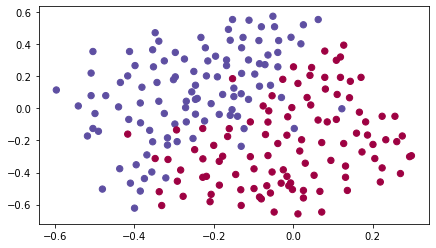

In [29]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [26]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    
        
    grads = {}
    costs = []                            
    m = X.shape[1]                       
    layers_dims = [X.shape[0], 20, 3, 1]
    

    parameters = initialize_parameters(layers_dims)

    

    for i in range(0, num_iterations):
        
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        
        assert(lambd==0 or keep_prob==1)    
        
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
       
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
     
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724213
Cost after iteration 20000: 0.13851642423245572


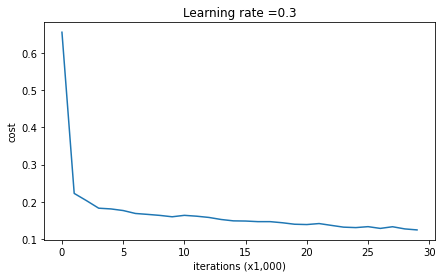

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [27]:
parameters = model(train_X, train_Y)
print ("Training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Test set:")
predictions_test = predict(test_X, test_Y, parameters)

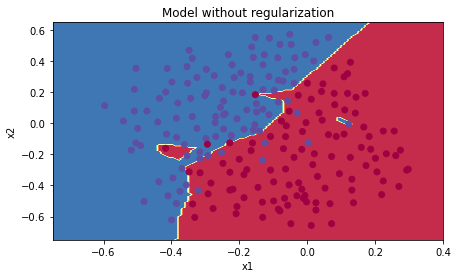

In [30]:
plt.title("Without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [44]:


def compute_cost_with_regularization(A3, Y, parameters, lambd):
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) 
    
    
    L2_regularization_cost =lambd *(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))/(2*m)
   
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [45]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 1.7864859451590758


In [63]:


def backward_propagation_with_regularization(X, Y, cache, lambd):
   
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m*W3
   
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m*W2
   
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m*W1
    
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [64]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.711)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))

dW1 = 
[[-0.25846622  0.12260893 -0.28490258]
 [-0.17697016  0.34664314 -0.44347846]]
dW2 = 
[[ 0.79387035  0.85332107]
 [-0.0972261  -0.01747499]
 [-0.13306641 -0.03809368]]
dW3 = 
[[-1.77842525 -0.12018824 -0.0954512 ]]


Cost after iteration 0: 0.6981038481225769
Cost after iteration 10000: 0.26909122020277937
Cost after iteration 20000: 0.26836856849120894


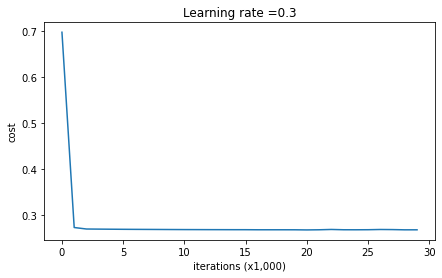

On the train set:
Accuracy: 0.933649289099526
On the test set:
Accuracy: 0.95


In [65]:
parameters = model(train_X, train_Y, lambd = 0.711)
print ("Train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Test set:")
predictions_test = predict(test_X, test_Y, parameters)

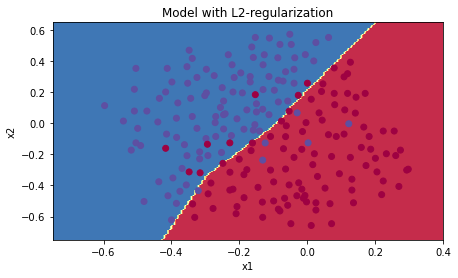

In [66]:
plt.title("With L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)